In [1]:
from thermalmodels_fixedtemp import FirstOrderModel
from DR_thermalenvironments import DirectControlEnv, SetpointDeltaEnv, DirectSetpointEnv
 
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN, A2C,PPO2,ACER,TRPO

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
from itertools import cycle
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('combined_csv.csv')

In [4]:
prices = df[["Spot Price ($/MWh)"]]      
prices = np.array(prices)


In [5]:
np.min(prices)

-41.38

In [6]:
policy1 = A2C.load('a2c_2')

Loading a model without an environment, this model cannot be trained until it has a valid environment.





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




In [7]:
policy2 = A2C.load('a2c_3')

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [8]:
from stable_baselines.common.policies import FeedForwardPolicy, register_policy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Custom MLP policy of three layers of size 128 each
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[dict(pi=[128, 128, 128],
                                                          vf=[128,128,128])],
                                           feature_extraction="mlp")

# Register the policy, it will check that the name is not already taken
register_policy('CustomPolicy', CustomPolicy)

In [ ]:
#Instantiate the firstorder model
tcl = FirstOrderModel(10*60, 20*60, 21,2,0.3)  # Calling the function firstorder model arg1,2- seconds to heat and seconds to cool, arg3-Goal, flex and noise

env = DirectSetpointEnv(tcl,prices,policy1,policy2)

#model3 = DQN("MlpPolicy", env, verbose=1, exploration_fraction=0.30, exploration_final_eps=0.1,target_network_update_freq=10000,prioritized_replay = True,buffer_size=100000,double_q = True,
           #  seed = 30, tensorboard_log="/floyd/home")    # 
model2 = ACER("MlpPolicy", env, gamma=0.95, verbose=0,seed = 12201,tensorboard_log="/floyd/home/fix_temp");
#model = PPO2("MlpPolicy", env, gamma=0.90, verbose=1);
model2.learn(total_timesteps=70000)
model2.save("default1")

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.





In [10]:
from stable_baselines.common.vec_env import VecVideoRecorder, DummyVecEnv

In [13]:
tcl = FirstOrderModel(10*60, 20*60, 21,2,0.3)  # Calling the function firstorder model arg1,2- seconds to heat and seconds to cool, arg3-Goal, flex and noise

env = DirectSetpointEnv(tcl,prices,policy1,policy2)

In [37]:
tcl = FirstOrderModel(25*60, 35*60, 21,2,0.2)  # Calling the function firstorder model arg1,2- seconds to heat and seconds to cool, arg3-Goal, flex and noise

env = DirectSetpointEnv(tcl,prices,policy1,policy2)

In [38]:
env = DummyVecEnv([lambda: env])

In [21]:
obs = env.reset()

In [11]:
obs

array([20.09912462,  9.        ,  3.        , 43.51      , 43.51      ,
        1.        ])

In [20]:
# Model A2C Policy
tcl = FirstOrderModel(22*60,33*60, 21,2,0.2) 
env = DirectSetpointEnv(tcl,prices,policy1,policy2)
mean_reward, std_reward,sum_cost,std_cost,sum_comfort,std_comfort = evaluate(model_new, env, n_eval_episodes=50,baseline = True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
print(f"total_costs:{sum_cost:.2f} +/- {std_cost:.2f}")
print(f"total_comfort:{sum_comfort:.2f} +/- {std_comfort:.2f}")

mean_reward:270.08 +/- 4.96
total_costs:7.52 +/- 1.73
total_comfort:288.00 +/- 0.00


In [21]:
# Model A2C Policy
tcl = FirstOrderModel(22*60,33*60, 21,2,0.2) 
env = DirectSetpointEnv(tcl,prices,policy1,policy2)
amean_reward, astd_reward,asum_cost,astd_cost,asum_comfort,astd_comfort = evaluate(model2, env, n_eval_episodes=50)
print(f"mean_reward:{amean_reward:.2f} +/- {astd_reward:.2f}")
print(f"total_costs:{asum_cost:.2f} +/- {astd_cost:.2f}")
print(f"total_comfort:{asum_comfort:.2f} +/- {astd_comfort:.2f}")

mean_reward:274.50 +/- 4.58
total_costs:5.82 +/- 1.61
total_comfort:287.67 +/- 0.12


In [15]:
model_new = A2C.load("trans01",tensorboard_log="/floyd/home/trans_t1",seed=100011)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [18]:
env = DummyVecEnv([lambda: env])
model_new.set_env(env)

In [ ]:
# Model A2C Policy
tcl = FirstOrderModel(22*60,33*60, 21,2,0.2) 
env = DirectSetpointEnv(tcl,prices,policy1,policy2)
amean_reward, astd_reward,asum_cost,astd_cost,asum_comfort,astd_comfort = evaluate(model_new, env, n_eval_episodes=50)
print(f"mean_reward:{amean_reward:.2f} +/- {astd_reward:.2f}")
print(f"total_costs:{asum_cost:.2f} +/- {astd_cost:.2f}")
print(f"total_comfort:{asum_comfort:.2f} +/- {astd_comfort:.2f}")

In [13]:
for i in price3:
    if i > 80:
        print(i)

In [11]:
obs = env.reset()

In [50]:
obs = [18.85872821, 18         ,38.50959   ]

In [14]:
seconds3 = []
price3 = []
reward3 = []
temp3 = []
setpoint3 = []
times = []
obs = env.reset()
dones = False
#while not dones:
for i in range(500):
    action, _states = model2.predict(obs)
   
    obs, rewards, dones, info = env.step(action)
    
    seconds3.append(info['SecondsON'])
    setpoint3.append((info['Action']/2) + 10)
    reward3.append(rewards)
    times.append(i)
    temp3.append(obs[0])
    print(obs[0],rewards,info)
   # env.render(mode='human')

19.760516026554566 1.0 {'SecondsON': 0, 'Price': 11.3, 'Action': 1, 'Cost': 0.0, 'Comfort': 1.0}
20.51454158613962 1.0 {'SecondsON': 30, 'Price': 11.3, 'Action': 23, 'Cost': 0.02354166666666667, 'Comfort': 1.0}
21.307867276936026 1.0 {'SecondsON': 0, 'Price': 11.3, 'Action': 20, 'Cost': 0.0, 'Comfort': 1.0}
20.559989587759112 1.0 {'SecondsON': 0, 'Price': 11.3, 'Action': 9, 'Cost': 0.0, 'Comfort': 1.0}
19.84699371041591 1.0 {'SecondsON': 0, 'Price': 11.3, 'Action': 20, 'Cost': 0.0, 'Comfort': 1.0}
20.199652955519273 1.0 {'SecondsON': 14, 'Price': 11.3, 'Action': 20, 'Cost': 0.010986111111111111, 'Comfort': 1.0}
21.23666169427405 1.0 {'SecondsON': 25, 'Price': 11.3, 'Action': 23, 'Cost': 0.01961805555555556, 'Comfort': 1.0}
21.540622194700276 1.0 {'SecondsON': 0, 'Price': 11.3, 'Action': 20, 'Cost': 0.0, 'Comfort': 1.0}
21.54242897489706 1.0 {'SecondsON': 14, 'Price': 11.3, 'Action': 23, 'Cost': 0.010986111111111111, 'Comfort': 1.0}
21.39224032143843 1.0 {'SecondsON': 0, 'Price': 11.3, 

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

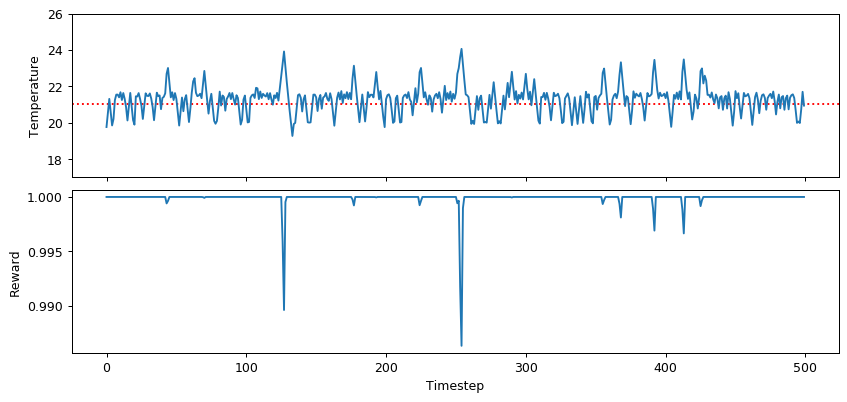

In [16]:
### Plot the resulting temperature trajectory.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11,5), dpi=90)
plt.subplots_adjust(hspace=0.075) # Reduce space between plots
#ax1.axvspan(start, start+length, facecolor='0.95') # Shade the demand-response times with grey background
ax1.axhline(y=21, linestyle=':', color='red') # Plot the goal temperature
ax1.plot(times, temp3) # Plot the observed temperatures
ax1.set_ylabel('Temperature')
ax1.set_ylim(17,26)
ax2.plot(times, reward3) # Plot the activations on a separate axis.
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Reward');

In [30]:
min(reward3)

-1343.1665288827978

In [32]:
min(reward3)

-2641.95817845267

In [ ]:
### Plot the resulting temperature trajectory.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11,5), dpi=90)
plt.subplots_adjust(hspace=0.075) # Reduce space between plots
#ax1.axvspan(start, start+length, facecolor='0.95') # Shade the demand-response times with grey background
ax1.axhline(y=20, linestyle=':', color='black') # Plot the goal temperature
ax1.plot(times, temps) # Plot the observed temperatures
ax1.set_ylabel('Temperature')
ax1.set_ylim(17.5,22.5)
ax2.bar(times, uses) # Plot the activations on a separate axis.
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Power');